# Optimization Methods for Data Science

##### Authors: Mojtaba Amini , Kamile Dementaviciute, Saeed Soufeh

##### HW1
##### Deadline: 04/11/2022

In the first part, the random data has been generated.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
from time import process_time
import pandas as pd
from sklearn.utils import fixes
from sklearn.metrics.pairwise import euclidean_distances

Original size of X= 300	Unlabeled size = 294	labeled size = 6
Original size of y= 300	Unlabeled size = 294	labeled size = 6


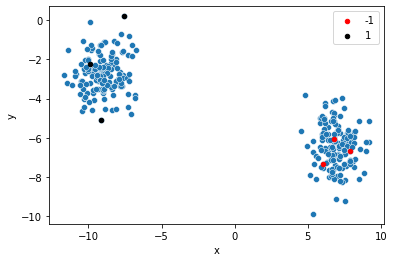

In [3]:
# generate 2d classification dataset
np.random.seed(15)
X, y = make_blobs(n_samples=300, centers=2, n_features=2)
x_Unlabeled ,x_labeled_bar,y1,y_label = train_test_split(X,y,test_size=0.02)

print(f"Original size of X= {X.shape[0]}\tUnlabeled size = {x_Unlabeled.shape[0]}\tlabeled size = {x_labeled_bar.shape[0]}")
print(f"Original size of y= {y.shape[0]}\tUnlabeled size = {y1.shape[0]}\tlabeled size = {y_label.shape[0]}")

y_label=y_label*2-1
df = DataFrame(dict(x=x_labeled_bar[:,0], y=x_labeled_bar[:,1], label=y_label))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
sns.scatterplot(ax=ax,x=X[:,0],y=X[:,1])
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()



### <mark><b>Similarity Measure function</b></mark>

<ol>
  <li><b>Euclidean Distance</b></li>
  At first, for similarity, the similarity measure function has been defined as below:
  $$ d(x,y) = {e^{\sum_{i=1}^k (x_i-y_i)^2 }}$$

  So the similarity matrix is defined as below:

  $$\omega_{ij}={e^{(x_{1i}-x_{1j})^2+(x_{2i}-x_{2j})^2}}$$

  ${x_1}$ refer to the first dimension and ${x_2}$ is the second dimension in 2D.

  ${i ,j}$ are two indexes for labeled and unlabeled data. 

  Therefore the matrix is as below:

  $$
\omega_{ij}= \begin{bmatrix}
{e^{(x_{11}-x_{11})^2+(x_{21}-x_{21})^2}} & {e^{(x_{11}-x_{12})^2+(x_{21}-x_{22})^2}} & \cdots \\
{e^{(x_{12}-x_{11})^2+(x_{22}-x_{21})^2}} & \ddots & \cdots \\
\vdots & \cdots & \cdots \\
\end{bmatrix}
$$
</ol>

<b>Defining Similarity functions</b>

<b> Initializing matrixes</b>

In [4]:
def initialize_parameters(x_Unlabeled):
  np.random.seed(4)
# initialize the parameters with non-zeros numbers between(0,1)
  y_unlabel=np.random.rand(len(x_Unlabeled))*0.01
  return y_unlabel

<b>Defining the similarity matrix</b>

In [5]:
def similarity(x_Unlabeled,x_labeled_bar,type):
  wij=np.zeros((len(x_labeled_bar),len(x_Unlabeled)))
  wij_bar=np.zeros((len(x_Unlabeled),len(x_Unlabeled)))

  if type=="Gaussian" :
    wij = np.exp(- euclidean_distances(x_labeled_bar,x_Unlabeled))
    wij_bar = np.exp(-euclidean_distances(x_Unlabeled,x_Unlabeled))

  return wij,wij_bar


wij,wij_bar = similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
print(wij.shape[0], wij.shape[1])  

6 294


### <mark><b>Cost function and it's derivative</b></mark>


 Cost function:
  $$ \min_{y\in{R^u}} \sum_{i=1}^l\sum_{j=1}^u \omega_{ij}(y^{j}-\bar{y}^{i})^2 + \frac{1}{2} \sum_{i=1}^u\sum_{j=1}^u \bar{\omega}_{ij}(y^{j}-y^{i})^2 $$

Gradient with respect to $y^{j}$:
$$\nabla_{y^{j}} f(y)=2\sum_{i=1}^l \omega_{ij}(y^{j}-\bar{y}^{i})+2 \sum_{i=1}^u \bar{\omega}_{ij}(y^{j}-y^{i})$$

$u$ : unlabeled data

$l$ : labeled data

$y$ : predicted label ( parameters)

$\bar{y}$ : determined label

$\omega_{ij}$ : similarity measure matrix between labeled and unlabeled data

$\bar{\omega}_{ij}$ : similarity measure matrix between unlabeled data


In [6]:
def cost_function(wij,wij_bar,y_unlabel,y_label):
  cost=0.0

  y_label_matrix = np.tile(y_label,(y_unlabel.shape[0],1))
  y_unlabel_array = np.reshape(y_unlabel,(y_unlabel.shape[0],1))
  wij_reshaped = wij.T
  sub1 = np.power(y_label_matrix-y_unlabel_array,2)
  mat1 = wij_reshaped*sub1
  term1 = np.sum(mat1)

  y_unlabel_matrix = np.tile(y_unlabel,(y_unlabel.shape[0],1))
  y_unlabel_array = np.reshape(y_unlabel,(y_unlabel.shape[0],1))
  wij_bar_reshaped = wij_bar.T
  sub2 = np.power(y_unlabel_matrix-y_unlabel_array,2)
  mat2 = wij_bar_reshaped*sub2
  term2 = np.sum(mat2)

  cost = term1 + 0.5*term2
  return cost

In [7]:
# def dev_function(wij,wij_bar,y_unlabel,y_label,method,index=1,size=0):

#  if method == "GD":
#    size = y_unlabel.shape[0]

#  dev = np.zeros(size)

#  for j in range(size):
#    term1=0.0
#    term2=0.0
   
#    for i in range(len(y_label)):
#      term1 = term1 + wij[i,size*(index-1)+j] * (y_unlabel[size*(index-1)+j] - y_label[i])

#    for i in range(len(y_unlabel)):
#      term2 = term2 + wij_bar[i,size*(index-1)+j]*(y_unlabel[size*(index-1)+j]-y_unlabel[i])
#    dev[j] = 2*(term1 + term2)

#  return dev  

In [8]:
def dev_function(wij,wij_bar,y_unlabel,y_label,method,index=1,size=0):

  if method == "GD":

    y_label_matrix = np.tile(y_label,(y_unlabel.shape[0],1))
    y_unlabel_array = np.reshape(y_unlabel,(y_unlabel.shape[0],1))
    wij_reshaped = wij.T
    sub1 = y_label_matrix - y_unlabel_array
    mat1 = wij_reshaped * sub1
    term1 = np.sum(mat1,axis=1)

    y_unlabel_matrix = np.tile(y_unlabel,(y_unlabel.shape[0],1))
    y_unlabel_array = np.reshape(y_unlabel,(y_unlabel.shape[0],1))
    wij_bar_reshaped = wij_bar.T
    sub2 = y_unlabel_matrix - y_unlabel_array
    mat2 = wij_bar_reshaped * sub2
    term2 = np.sum(mat2, axis=1)

    dev = -2 *(term1 + term2)


  if method == "BCGD":

    y_mat = np.reshape(y_label,(y_label.shape[0],1))
    y_un = y_unlabel[index]
    y_mat= y_un - y_mat
    w = np.reshape(wij[:,index],(wij.shape[0],1)).T
    term1=float(np.dot(w,y_mat))

    y_mat = np.reshape(y_unlabel,(y_unlabel.shape[0],1))
    y_un = y_unlabel[index]
    y_mat= y_un - y_mat
    w = np.reshape(wij_bar[:,index],(wij_bar.shape[0],1)).T
    term2=float(np.dot(w,y_mat))

    dev = 2 *(term1 + term2)

  return dev  

### <mark><b>Gradient Descent</b></mark>


In [9]:
alpha=0.003
num_iterations=300
time_tracking_GD = []

y_unlabel = initialize_parameters(x_Unlabeled)
wij,wij_bar = similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_GD = []

In [10]:
t_start = process_time() 

for i in range(num_iterations): 
  derivative = dev_function(wij,wij_bar,y_unlabel,y_label,method = "GD")
  y_unlabel = y_unlabel-alpha*derivative
  cost_func_GD.append(cost_function(wij,wij_bar,y_unlabel,y_label))
  time_tracking_GD.append(process_time() - t_start)

t_stop = process_time()

Gradient Descend
CPU time: 0.8489032379999997


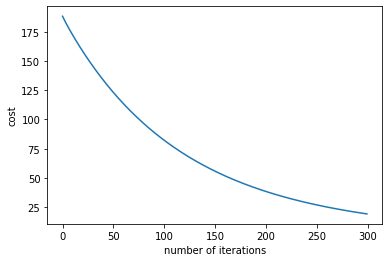

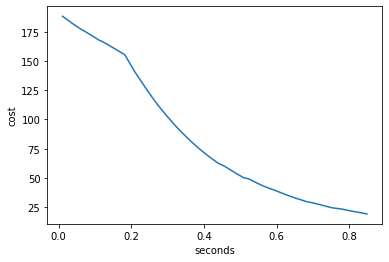

In [11]:
time_GD = t_stop - t_start

print("Gradient Descend")
print("CPU time:", time_GD)

sns.lineplot(x= range(len(cost_func_GD)),y=cost_func_GD)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()


sns.lineplot(x= time_tracking_GD,y=cost_func_GD)
plt.xlabel("seconds")
plt.ylabel("cost")
plt.show()

Visualizing the result to see that the assignment is correct or not!

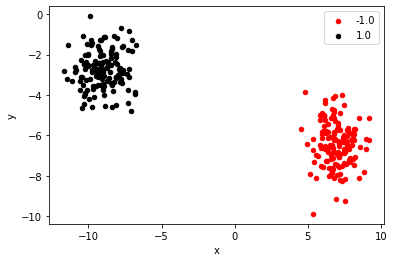

In [12]:
y_unlabel2=np.round((y_unlabel+1)/2)*2-1
df = DataFrame(dict(x=x_Unlabeled[:,0], y=x_Unlabeled[:,1], label=y_unlabel2))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
# sns.scatterplot(ax=ax,x=x_labeled_bar[:,0],y=x_labeled_bar[:,1])

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### <mark><b>Randomized Block Coordinate Gradient Decent</b></mark>

Since we want to be faster, we just want to calculate a part of derivative. Therefore, we change the derivative function for randomized and cyclic. methods.

In [13]:
alpha=0.003
num_iterations=300
time_tracking_RBCGD = []

y_unlabel=initialize_parameters(x_Unlabeled)
wij,wij_bar=similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_RBCGD = []

Block_size = 1
Num_Block = int(y_unlabel.shape[0]/Block_size)

In [14]:

t_start = process_time() 
for i in range(num_iterations):
  for n in range(1,Num_Block+1):

    Block_index = np.random.randint(1,Num_Block+1)
    derivative = dev_function(wij,wij_bar,y_unlabel,y_label,method = "BCGD",index = Block_index-1,size = Block_size)
    y_unlabel[Block_index-1] = y_unlabel[Block_index-1] -alpha*derivative

  cost_func_RBCGD.append(cost_function(wij,wij_bar,y_unlabel,y_label))
  time_tracking_RBCGD.append(process_time() - t_start)


t_stop = process_time()

Randomized BCGD
CPU time: 3.2067166929999997


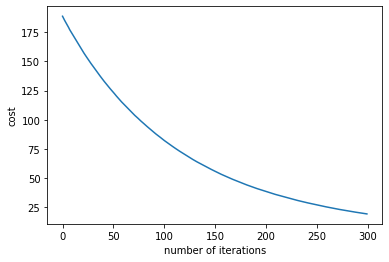

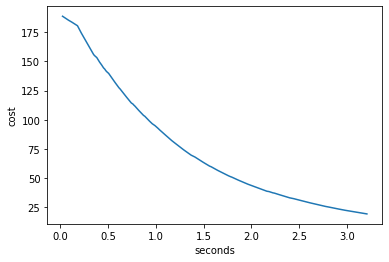

In [15]:
time_RBCGD = t_stop - t_start
print("Randomized BCGD")
print("CPU time:", time_RBCGD)

sns.lineplot(x = range(len(cost_func_RBCGD)),y = cost_func_RBCGD)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

sns.lineplot(x = time_tracking_RBCGD, y = cost_func_RBCGD)
plt.xlabel("seconds")
plt.ylabel("cost")
plt.show()

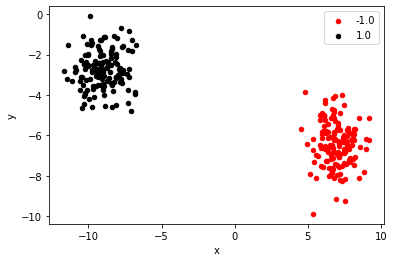

In [16]:
y_unlabel3=np.round((y_unlabel+1)/2)*2-1
df = DataFrame(dict(x=x_Unlabeled[:,0], y=x_Unlabeled[:,1], label=y_unlabel3))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
#sns.scatterplot(ax=ax,x=x_labeled_bar[:,0],y=x_labeled_bar[:,1])

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### <mark><b>Cyclic Block Coordinate Gradient Decent</b></mark>

In [17]:
alpha=0.003
num_iterations=300
time_tracking_CBCGD = [] 

y_unlabel=initialize_parameters(x_Unlabeled)
wij,wij_bar=similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_CBCGD = []

Block_size=1
Num_Block=int(y_unlabel.shape[0]/Block_size)

In [18]:

time_tracking_CBCGD = [] 

y_unlabel=initialize_parameters(x_Unlabeled)
wij,wij_bar=similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_CBCGD = []

Block_size=1
Num_Block=int(y_unlabel.shape[0]/Block_size)


t_start = process_time()

for i in range(num_iterations):
  for Block_index in range(1,Num_Block+1):
    
    derivative = dev_function(wij,wij_bar,y_unlabel,y_label,method = "BCGD",index = Block_index-1,size = Block_size)
    y_unlabel[Block_index-1] = y_unlabel[Block_index-1] -alpha*derivative

  cost_func_CBCGD.append(cost_function(wij,wij_bar,y_unlabel,y_label))
  time_tracking_CBCGD.append(process_time() - t_start)

t_stop = process_time()



BCGD with Cyclic Rule
CPU time: 2.737477321


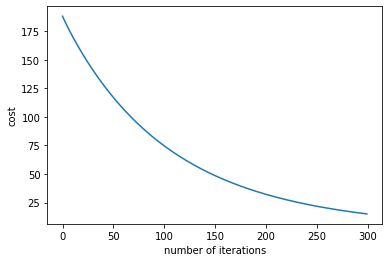

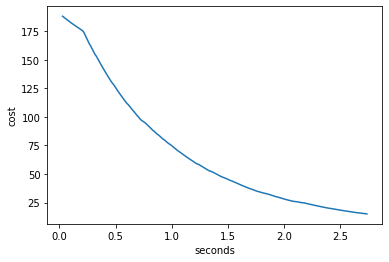

In [19]:
time_CBCGD = t_stop - t_start
print("BCGD with Cyclic Rule")
print("CPU time:", time_CBCGD)

sns.lineplot(x = range(len(cost_func_CBCGD)),y = cost_func_CBCGD)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

sns.lineplot(x = time_tracking_CBCGD, y = cost_func_CBCGD)
plt.xlabel("seconds")
plt.ylabel("cost")
plt.show()

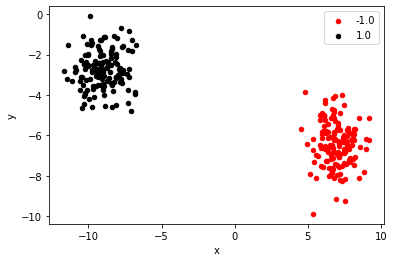

In [20]:
y_unlabel3=np.round((y_unlabel+1)/2)*2-1
df = DataFrame(dict(x=x_Unlabeled[:,0], y=x_Unlabeled[:,1], label=y_unlabel3))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
#sns.scatterplot(ax=ax,x=x_labeled_bar[:,0],y=x_labeled_bar[:,1])
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

## Comparison of all three methods

GD CPU time: 0.8489032379999997
RBCGD CPU time: 3.2067166929999997
CBCGD CPU time: 2.737477321


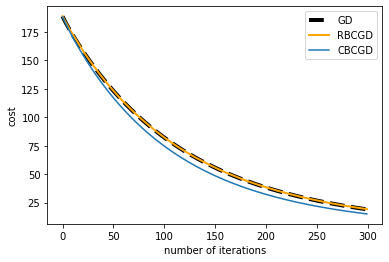

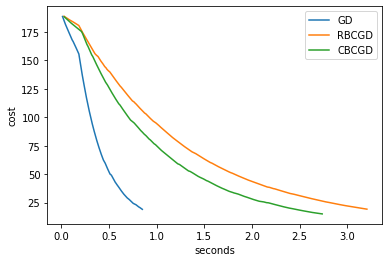

In [21]:
print("GD CPU time:", time_GD)
print("RBCGD CPU time:", time_RBCGD)
print("CBCGD CPU time:", time_CBCGD)

# plt.plot(range(len(cost_func_GD)),cost_func_GD,linewidth=2,label='GD', marker ='*')
# plt.plot(range(len(cost_func_GD)),cost_func_RBCGD,linewidth=2,label='RBCGD')
# plt.plot(range(len(cost_func_GD)),cost_func_CBCGD,linewidth=2,label='CBCGD')

sns.lineplot(x= range(len(cost_func_GD)),y=cost_func_GD, label='GD', linestyle="--",color="black",linewidth = 4)
sns.lineplot(x = range(len(cost_func_RBCGD)),y = cost_func_RBCGD, label='RBCGD',color="orange",linewidth = 2)
sns.lineplot(x = range(len(cost_func_CBCGD)),y = cost_func_CBCGD, label='CBCGD')
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.savefig("N300-1.png",dpi=300)
plt.show()


sns.lineplot(x= time_tracking_GD,y=cost_func_GD, label='GD')
sns.lineplot(x = time_tracking_RBCGD, y = cost_func_RBCGD, label='RBCGD')
sns.lineplot(x = time_tracking_CBCGD, y = cost_func_CBCGD, label='CBCGD')
plt.xlabel("seconds")
plt.ylabel("cost")
plt.savefig("N300-2.png",dpi=300)
plt.show()


##Comparison based on sample size

In [22]:
n_sample = [300, 1000, 3000, 5000, 7000, 10000]
gd_time = [0.43, 4.79, 34.16, 77.54, 308.67, 1368.47]
rbcgd_time = [1.76, 12.67, 51.77, 104.32, 407.2, 2317.06]
cbcgd_time = [1.37, 6.52, 37.01, 75.84, 418.39, 1290.57]

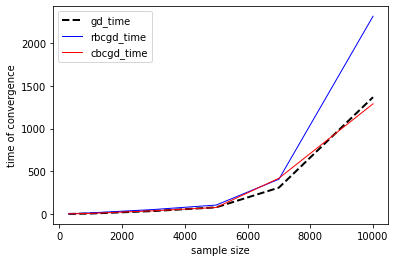

In [23]:
#plt.plot(x = n_sample, )
sns.lineplot(x = n_sample, y = gd_time, label='gd_time',color="black",linestyle="--",linewidth = 2)
sns.lineplot(x = n_sample, y = rbcgd_time, label='rbcgd_time',color="blue",linewidth = 1)
sns.lineplot(x = n_sample, y = cbcgd_time, label='cbcgd_time',color="red",linewidth = 1)
plt.xlabel("sample size")
plt.ylabel("time of convergence")
plt.legend(loc="best")
plt.savefig("sample size-time.png",dpi=300)
plt.show()

## Testing the methods with an outsourced dataset

In [24]:
# Download it using wget (Linux) or manually download it and place on the same folder as this notebook
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2022-05-11 19:00:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data’

spambase.data       100%[===================>] 686.47K  2.08MB/s    in 0.3s    

2022-05-11 19:00:53 (2.08 MB/s) - ‘spambase.data’ saved [702942/702942]



In [25]:
import csv

reader = csv.reader(open('spambase.data', "r"), delimiter=",")
data = list(reader)

X = np.empty([len(data), 57])
y = np.empty(len(data))


for i in range(len(data)):
  mylist = data[i]
  mylist = [float(a) for a in mylist]
  y[i]=int(mylist[-1])
  mylist.pop()
  X[i]=mylist

In [26]:
x_Unlabeled ,x_labeled_bar,y1,y_label = train_test_split(X,y,test_size=0.02)

In [27]:
print(f"Original size of X= {X.shape[0]}\tUnlabeled size = {x_Unlabeled.shape[0]}\tlabeled size = {x_labeled_bar.shape[0]}")
print(f"Original size of y= {y.shape[0]}\tUnlabeled size = {y1.shape[0]}\tlabeled size = {y_label.shape[0]}")

y_label=y_label*2-1
print(y_label)

Original size of X= 4601	Unlabeled size = 4508	labeled size = 93
Original size of y= 4601	Unlabeled size = 4508	labeled size = 93
[-1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.
 -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.
  1.  1. -1.]


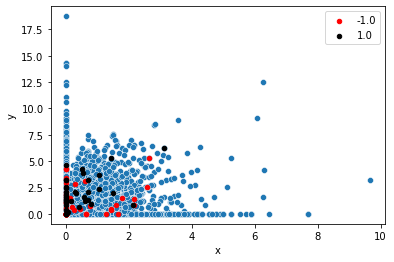

In [28]:
df = DataFrame(dict(x=x_labeled_bar[:,11], y=x_labeled_bar[:,18], label=y_label))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
sns.scatterplot(ax=ax,x=X[:,11],y=X[:,18])

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### <mark><b>Gradient Descent</b></mark>


In [29]:
alpha=0.003
num_iterations=300
time_tracking_GD = []

y_unlabel = initialize_parameters(x_Unlabeled)
wij,wij_bar = similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_GD = []

In [30]:
t_start = process_time() 

for i in range(num_iterations): 
  derivative = dev_function(wij,wij_bar,y_unlabel,y_label,method = "GD")
  y_unlabel = y_unlabel-alpha*derivative
  cost_func_GD.append(cost_function(wij,wij_bar,y_unlabel,y_label))
  time_tracking_GD.append(process_time() - t_start)

t_stop = process_time()

Gradient Descend
CPU time: 165.199582827


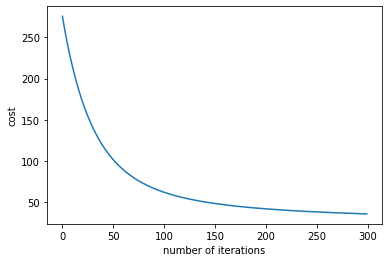

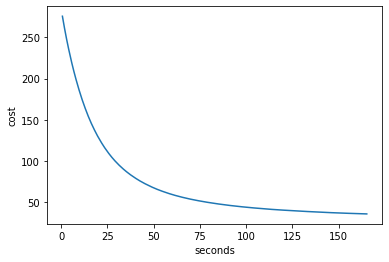

In [31]:
time_GD = t_stop - t_start

print("Gradient Descend")
print("CPU time:", time_GD)

sns.lineplot(x= range(len(cost_func_GD)),y=cost_func_GD)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()


sns.lineplot(x= time_tracking_GD,y=cost_func_GD)
plt.xlabel("seconds")
plt.ylabel("cost")
plt.show()

Visualizing the result to see that the assignment is correct or not!

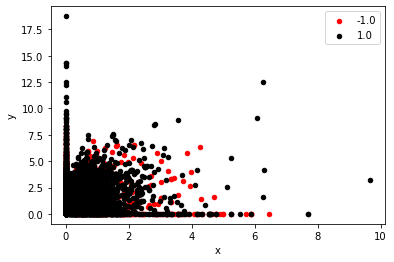

In [32]:
y_unlabel2=np.round((y_unlabel+1)/2)*2-1
df = DataFrame(dict(x=x_Unlabeled[:,11], y=x_Unlabeled[:,18], label=y_unlabel2))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
# sns.scatterplot(ax=ax,x=x_labeled_bar[:,0],y=x_labeled_bar[:,1])

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### <mark><b>Randomized Block Coordinate Gradient Decent</b></mark>

Since we want to be faster, we just want to calculate a part of derivative. Therefore, we change the derivative function for randomized and cyclic. methods.

In [33]:
time_tracking_RBCGD = []

y_unlabel=initialize_parameters(x_Unlabeled)
wij,wij_bar=similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_RBCGD = []

Block_size = 1
Num_Block = int(y_unlabel.shape[0]/Block_size)

In [34]:
t_start = process_time() 
for i in range(num_iterations):
  for n in range(1,Num_Block+1):

    Block_index = np.random.randint(1,Num_Block+1)
    derivative = dev_function(wij,wij_bar,y_unlabel,y_label,method = "BCGD",index = Block_index-1,size = Block_size)
    y_unlabel[Block_index-1] = y_unlabel[Block_index-1] -alpha*derivative

  cost_func_RBCGD.append(cost_function(wij,wij_bar,y_unlabel,y_label))
  time_tracking_RBCGD.append(process_time() - t_start)


t_stop = process_time()

Randomized BCGD
CPU time: 231.59452334099998


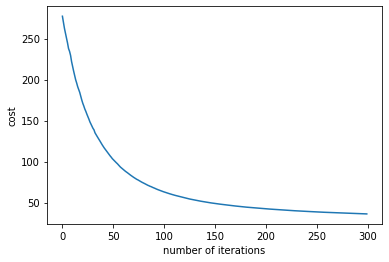

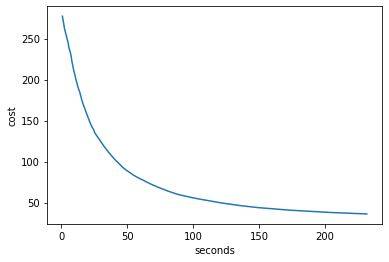

In [35]:
time_RBCGD = t_stop - t_start
print("Randomized BCGD")
print("CPU time:", time_RBCGD)

sns.lineplot(x = range(len(cost_func_RBCGD)),y = cost_func_RBCGD)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

sns.lineplot(x = time_tracking_RBCGD, y = cost_func_RBCGD)
plt.xlabel("seconds")
plt.ylabel("cost")
plt.show()

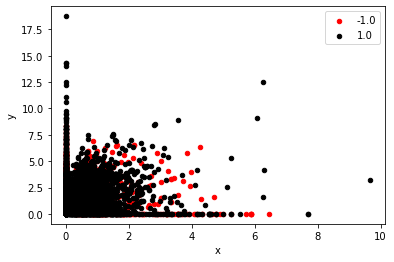

In [36]:
y_unlabel3=np.round((y_unlabel+1)/2)*2-1
df = DataFrame(dict(x=x_Unlabeled[:,11], y=x_Unlabeled[:,18], label=y_unlabel3))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
#sns.scatterplot(ax=ax,x=x_labeled_bar[:,0],y=x_labeled_bar[:,1])

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### <mark><b>Cyclic Block Coordinate Gradient Decent</b></mark>

In [37]:
time_tracking_CBCGD = [] 

y_unlabel=initialize_parameters(x_Unlabeled)
wij,wij_bar=similarity(x_Unlabeled,x_labeled_bar,"Gaussian")
cost_func_CBCGD = []

Block_size=1
Num_Block=int(y_unlabel.shape[0]/Block_size)

In [38]:
t_start = process_time()

for i in range(num_iterations):
  for Block_index in range(1,Num_Block+1):
    
    derivative = dev_function(wij,wij_bar,y_unlabel,y_label,method = "BCGD",index = Block_index-1,size = Block_size)
    y_unlabel[Block_index-1] = y_unlabel[Block_index-1] -alpha*derivative

  cost_func_CBCGD.append(cost_function(wij,wij_bar,y_unlabel,y_label))
  time_tracking_CBCGD.append(process_time() - t_start)

t_stop = process_time()

BCGD with Cyclic Rule
CPU time: 160.85113241999994


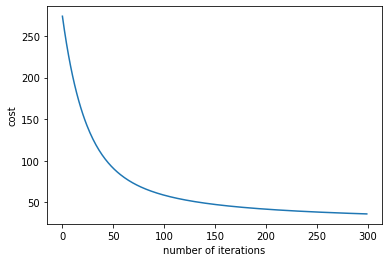

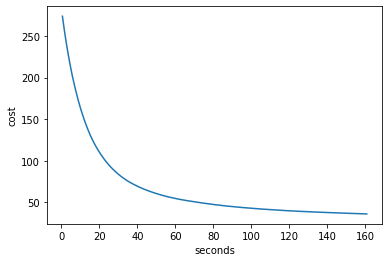

In [39]:
time_CBCGD = t_stop - t_start
print("BCGD with Cyclic Rule")
print("CPU time:", time_CBCGD)

sns.lineplot(x = range(len(cost_func_CBCGD)),y = cost_func_CBCGD)
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.show()

sns.lineplot(x = time_tracking_CBCGD, y = cost_func_CBCGD)
plt.xlabel("seconds")
plt.ylabel("cost")
plt.show()

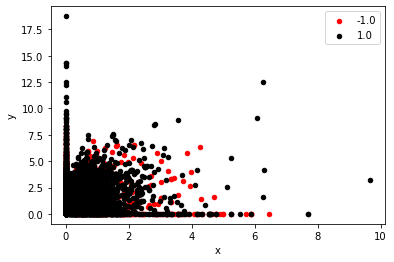

In [40]:
y_unlabel3=np.round((y_unlabel+1)/2)*2-1
df = DataFrame(dict(x=x_Unlabeled[:,11], y=x_Unlabeled[:,18], label=y_unlabel3))
colors = {-1:'red', 1:'black'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
#sns.scatterplot(ax=ax,x=x_labeled_bar[:,0],y=x_labeled_bar[:,1])
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

## Comparison of all three methods

GD CPU time: 165.199582827
RBCGD CPU time: 231.59452334099998
CBCGD CPU time: 160.85113241999994


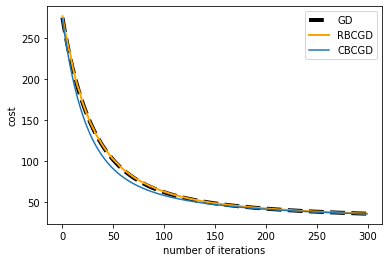

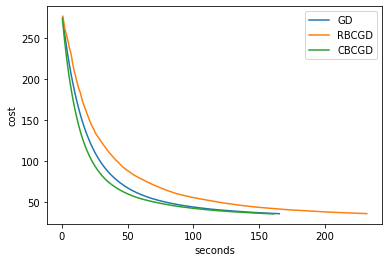

In [41]:
print("GD CPU time:", time_GD)
print("RBCGD CPU time:", time_RBCGD)
print("CBCGD CPU time:", time_CBCGD)

# plt.plot(range(len(cost_func_GD)),cost_func_GD,linewidth=2,label='GD', marker ='*')
# plt.plot(range(len(cost_func_GD)),cost_func_RBCGD,linewidth=2,label='RBCGD')
# plt.plot(range(len(cost_func_GD)),cost_func_CBCGD,linewidth=2,label='CBCGD')

sns.lineplot(x= range(len(cost_func_GD)),y=cost_func_GD, label='GD', linestyle="--",color="black",linewidth = 4)
sns.lineplot(x = range(len(cost_func_RBCGD)),y = cost_func_RBCGD, label='RBCGD',color="orange",linewidth = 2)
sns.lineplot(x = range(len(cost_func_CBCGD)),y = cost_func_CBCGD, label='CBCGD')
plt.xlabel("number of iterations")
plt.ylabel("cost")
plt.savefig("new-data-1.png",dpi=300)
plt.show()


sns.lineplot(x= time_tracking_GD,y=cost_func_GD, label='GD')
sns.lineplot(x = time_tracking_RBCGD, y = cost_func_RBCGD, label='RBCGD')
sns.lineplot(x = time_tracking_CBCGD, y = cost_func_CBCGD, label='CBCGD')
plt.xlabel("seconds")
plt.ylabel("cost")
plt.savefig("new-data-2.png",dpi=300)
plt.show()
